# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [11]:
# load imdb dataset as pandas dataframe
df = pd.read_csv("data/imdb_1000.csv")

In [12]:
# show first 5 rows of imdb_df
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [33]:
# load bikes dataset as pandas dataframe
df1=pd.read_csv("data/bikes.csv",sep=";",parse_dates=['Date'], dayfirst=True, index_col='Date')

In [34]:
# show first 3 rows of bikes_df
df1.head(3)

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [35]:
# list columns of imdb_df
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [36]:
# what are the datatypes of values in columns
df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [37]:
# list first 5 movie titles
df['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [38]:
# show only movie title and genre
df[['title','genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [39]:
# show the type of duration column
df.duration.dtype

dtype('int64')

In [40]:
# show duration values of movies as numpy arrays
df.duration.values[:10]

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139], dtype=int64)

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [41]:
# convert all the movie titles to uppercase
upper=lambda x:x.upper()
df['title'].apply(upper).head()

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

In [42]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Date'>

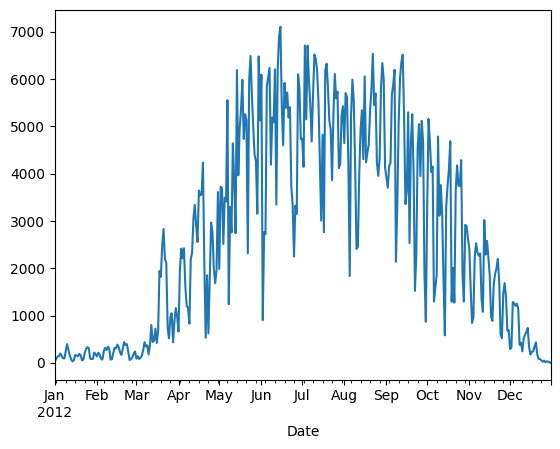

In [43]:
# plot the bikers travelling to Berri1 over the year
df1['Berri1'].plot()

<AxesSubplot: xlabel='Date'>

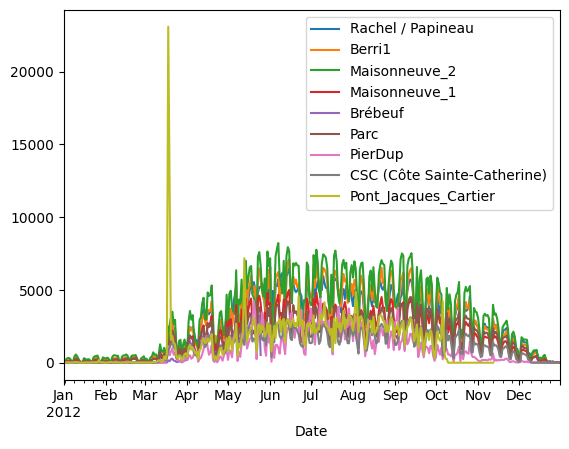

In [44]:
# plot all the columns of bikes_df
df1.plot()

## Value counts

Get count of unique values in a particular column/Series.

In [45]:
# what are the unique genre in imdb_df?
df['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

<AxesSubplot: >

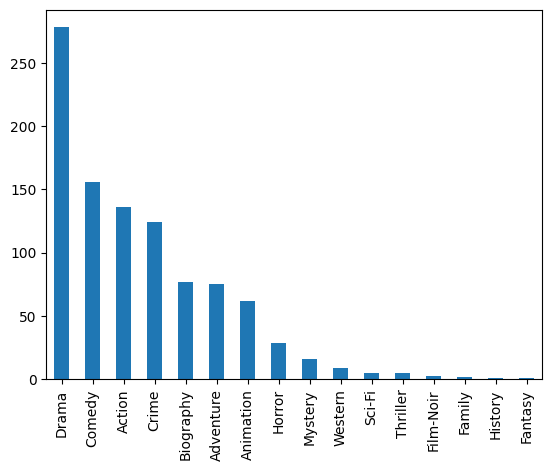

In [46]:
# plotting value counts of unique genres as a bar chart
df['genre'].value_counts().plot.bar()

<AxesSubplot: ylabel='genre'>

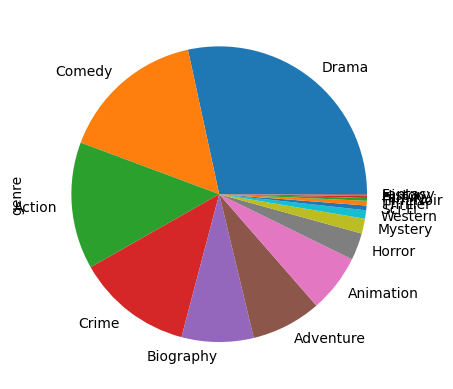

In [47]:
# plotting value counts of unique genres as a pie chart
df['genre'].value_counts().plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [48]:
# show index of bikes_df
df1.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [50]:
# get row for date 2012-01-01
df1.loc['2012-01-01']

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                          5.0
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            27.0
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [51]:
# show 11th row of imdb_df using iloc
df1.iloc[10]

Unnamed: 1                     00:00
Rachel / Papineau                194
Berri1                           273
Maisonneuve_2                    443
Maisonneuve_1                    182
Brébeuf                          7.0
Parc                             258
PierDup                           12
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            20.0
Name: 2012-01-11 00:00:00, dtype: object

## Selecting rows where column has a particular value

In [52]:
# select only those movies where genre is adventure
df[df['genre']=='Adventure']

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [53]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
m = (df['star_rating'] > 8) & (df['duration'] > 130)
df[m]['genre'].value_counts()

Drama        36
Action       20
Adventure    17
Crime        13
Biography    12
Western       6
Comedy        6
Mystery       3
Horror        1
Animation     1
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [54]:
# add a weekday column to bikes_df
df1['weekday'] = df1.index.weekday

## Deleting an existing column from DataFrame

In [55]:
# remove column 'Unnamed: 1' from bikes_df
df1.drop('Unnamed: 1', axis=1, inplace=True)

## Deleting a row in DataFrame

In [56]:
# remove row no. 1 from bikes_df
df1.drop(df1.index[0]).head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3
2012-01-06,75,146,244,98,4.0,86,4,0,17.0,4


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [57]:
# group imdb_df by movie genres
g = df.groupby('genre')

In [58]:
# get crime movies group
g.get_group('Crime').head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."


In [59]:
# get mean of movie durations for each group
g.aggregate('mean')

C:\Users\aarti\AppData\Local\Temp\ipykernel_5520\1214325501.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.aggregate('mean')


,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [61]:
# change duration of all movies in a particular genre to mean duration of the group
df['new_duration'] = g['duration'].transform(lambda x:x.mean())

In [64]:
# drop groups/genres that do not have average movie duration greater than 120.
new_df = g.filter(lambda x: x['duration'].mean() > 120)
print(new_df)

     star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
972          7.4                                   Blue Valentine   
973          7.4                            The Cider House Rules   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2                R      Crime       200   

In [67]:
# group weekday wise bikers count
w = df1.groupby('weekday')

In [69]:
# get weekday wise biker count
wc = w.aggregate(sum)
print(wc)

         Rachel / Papineau  Berri1  Maisonneuve_2  Maisonneuve_1  Brébeuf  \
weekday                                                                     
0                   138881  142285         174610          95565  15436.0   
1                   131632  145795         179939          99421  10629.0   
2                   144531  163603         200273         112344  14876.0   
3                   150971  169976         210039         118633  15679.0   
4                   146979  150493         183961         104584  12259.0   
5                   118560  105635         109902          64872  11170.0   
6                   122115  102447         102272          57438  12032.0   

           Parc  PierDup  CSC (Côte Sainte-Catherine)  Pont_Jacques_Cartier  
weekday                                                                      
0         97001    47259                        64011               74692.0  
1        100007    35901                        63503               5355

<AxesSubplot: xlabel='weekday'>

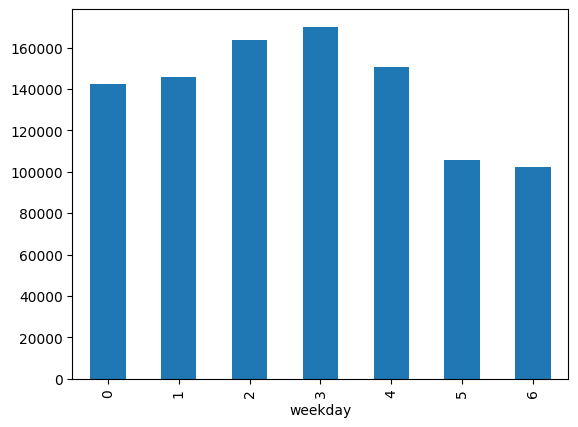

In [70]:
# plot weekday wise biker count for 'Berri1'
wc['Berri1'].plot.bar()

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)